In [231]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import os
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler

In [232]:
data = pd.read_csv('data.csv', sep = '\t', delimiter = None)

data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology


In [233]:
# duplicate data
data1 = data.copy()

data2 = data1[data1.columns.drop(list(data1.filter(regex='Q\d{1,2}[I,E]')))]
data2 = data2[data2.columns.drop(list(data2.filter(regex='(elapse)')))]

# print('Shape',data_1.shape)
# print('Attributes',data_1.columns)
# print('Shape',data_2.shape)
# print('Attributes',data_2.columns)

# resultant of above dataframe
# checking the types of varibles in the dataset(int,float,object)
dtypes=pd.DataFrame(data2.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=data2.nunique()
dtypes["Null Values"]=data2.isnull().sum()
dtypes["% null Values"]=data2.isnull().sum()/len(data2)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
Q1A,int64,4,0,0.000000
Q2A,int64,4,0,0.000000
Q3A,int64,4,0,0.000000
Q4A,int64,4,0,0.000000
Q5A,int64,4,0,0.000000
Q6A,int64,4,0,0.000000
Q7A,int64,4,0,0.000000
Q8A,int64,4,0,0.000000
Q9A,int64,4,0,0.000000
Q10A,int64,4,0,0.000000


In [234]:
# def remove_unused_column(data):
#   data = data.drop(columns='major')
#   data = data.drop(columns='country')
#   data = data.drop(columns='source')
#   data = data.drop(columns='screensize')
#   data = data.drop(columns='engnat')
#   data = data.drop(columns='uniquenetworklocation')	
#   data = data.drop(columns='hand')	
#   data = data.drop(columns='orientation')
  
#   return data

# data.head()

In [235]:
# data_1 = data.copy()
# Remove unused column
data_1 = data2.drop(columns ={'major', 'uniquenetworklocation','screensize', 'engnat','hand', 'orientation'})
# Remove time and position
# time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
# position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
# data_1 = data_1.drop(position,axis=1)
# data_1 = data_1.drop(time,axis=1)

# remove introelapse, testelapse, surveyelapse
data_1 = data_1.drop(data2.iloc[:,42:44],axis=1)
data_2 = data_1.copy()

# Remove VCL
data_2 = data_2.drop(data_2.iloc[:,52:68],axis=1)
data_2 = data_2.replace(to_replace=0,value=3)

# Rename Ten Item Personlaity code
data_2 = data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})

data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4


In [236]:
# Grouping age
def condition(x):
    if x <= 10:
        return 'Under Age'
    if  10 <= x <= 16:
        return 'Children'
    if 17 <= x <= 21:
        return 'Teen'
    if 21 <= x <= 35:
        return 'Adults'
    if 36 <= x <= 48:
        return 'Elder Adults'
    if x >= 49:
        return 'Older People'

data_2['AgeGroups'] = data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen


In [237]:
# Filter DAS
data_das = data_2.iloc[:,42:]
print('Attributes',data_das.columns)
data_3=data_2.filter(regex='Q\d{1,2}A')
print('Attributes',data_3.columns)
data_3.head()

Attributes Index(['Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'age',
       'religion', 'race', 'voted', 'married', 'familysize', 'AgeGroups'],
      dtype='object')
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A'],
      dtype='object')


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3


In [238]:
# Categorized DAS
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3 = sub(data_3)
das_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
d = []
for i in das_keys["Depression"]:
    d.append('Q'+str(i)+'A')
s = []
for i in das_keys["Stress"]:
    s.append('Q'+str(i)+'A')
a = []
for i in das_keys["Anxiety"]:
    a.append('Q'+str(i)+'A')
depression = data_3.filter(d)
stress = data_3.filter(s)
anxiety = data_3.filter(a)

In [239]:
# # scoring system
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression = scores(depression)
stress = scores(stress)
anxiety = scores(anxiety)

In [240]:
#Dass Specification
# DAS set
display(depression.head(), stress.head(), anxiety.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40


In [241]:
DEPRESSION = pd.merge(depression, data_das, how='inner', left_index=True, right_index=True)
ANXIETY = pd.merge(anxiety, data_das, how='inner', left_index=True, right_index=True)
STRESS = pd.merge(stress, data_das, how='inner', left_index=True, right_index=True)

print('Attributes',DEPRESSION.columns)
display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

Attributes Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Total_Count',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'age',
       'religion', 'race', 'voted', 'married', 'familysize', 'AgeGroups'],
      dtype='object')


,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen


In [249]:
def depression_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

def anxiety_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

def stress_condition(x):
    if x <= 13:
        return 'Normal'
    # if  10 <= x <= 13:
    #     return 'Mild'
    if 14 <= x <= 20:
        return 'Moderate'
    # if 21 <= x <= 27:
    #     return 'Severe'
    if x >= 21:
        return 'Severe'

DEPRESSION['Condition'] = DEPRESSION['Total_Count'].apply(depression_condition)
ANXIETY['Condition'] = ANXIETY['Total_Count'].apply(anxiety_condition)
STRESS['Condition'] = STRESS['Total_Count'].apply(stress_condition)

display(DEPRESSION.head(), STRESS.head(), ANXIETY.head())

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen,Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen,Severe


,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,3,3,3,3,3,3,3,3,1,3,3,40,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children,Severe
1,3,3,3,1,1,3,1,2,2,2,2,2,1,1,27,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children,Severe
2,2,2,2,1,0,0,1,2,1,1,2,0,2,1,17,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen,Moderate
3,1,2,1,1,0,3,0,0,3,2,0,1,0,2,16,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children,Moderate
4,1,1,3,1,3,3,3,2,1,1,3,3,2,2,29,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen,Severe


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups,Condition
0,3,3,3,1,3,2,2,3,3,2,1,3,2,3,34,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,Children,Severe
1,0,2,2,2,2,0,0,0,1,3,2,2,0,1,17,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,Children,Moderate
2,0,0,0,1,3,1,0,1,1,0,1,3,1,0,12,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,Teen,Normal
3,2,0,3,2,1,0,1,0,0,0,2,0,3,3,17,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,Children,Moderate
4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,40,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,Teen,Severe


In [243]:
# Simplified variable
data_depression=DEPRESSION.copy()
data_anxiety=ANXIETY.copy()
data_stress=STRESS.copy()

# def depression_value(x):
#     if x <= 13:
#         return '1'
#     # if  10 <= x <= 13:
#     #     return 1
#     # if 14 <= x <= 20:
#     #     return 2
#     # if 21 <= x <= 27:
#     #     return 3
#     # if x > 28:
#     #     return 4
#     if 14 <= x <= 20:
#         return '2'
#     if x >= 21:
#         return '3'
# def anxiety_value(x):
#     if x <= 13:
#         return '0'
#     # if  10 <= x <= 13:
#     #     return 1
#     # if 14 <= x <= 20:
#     #     return 2
#     # if 21 <= x <= 27:
#     #     return 3
#     # if x > 28:
#     #     return 4
#     if 14 <= x <= 20:
#         return '1'
#     if x >= 21:
#         return '2'

def stress_value(x):
    if x <= 13:
        return '0'
    # if  10 <= x <= 13:
    #     return 1
    # if 14 <= x <= 20:
    #     return 2
    # if 21 <= x <= 27:
    #     return 3
    # if x > 28:
    #     return 4
    if 14 <= x <= 20:
        return '1'
    if x >= 21:
        return '2'
        
def age_value(x):
    if x <= 10:
        return 0
    if  10 <= x <= 16:
        return 1
    if 17 <= x <= 21:
        return 2
    if 21 <= x <= 35:
        return 3
    if 36 <= x <= 48:
        return 4
    if x >= 49:
        return 5

# data_depression['Condition'] = data_depression['Total_Count'].apply(depression_value)
data_depression['AgeGroups'] = data_depression['age'].apply(age_value)
# data_depression = data_depression.drop(columns=['age','Total_Count'])

# data_anxiety['Condition'] = data_anxiety['Total_Count'].apply(anxiety_value)
data_anxiety['AgeGroups'] = data_anxiety['age'].apply(age_value)
# data_anxiety = data_anxiety.drop(columns=['age','Total_Count'])

# data_stress['Condition'] = data_stress['Total_Count'].apply(stress_value)
data_stress['AgeGroups'] = data_stress['age'].apply(age_value)
# data_stress = data_stress.drop(columns=['age','Total_Count'])

pd.set_option('display.max_columns', None)
display(data_depression.head()) #, STRESS.head(), ANXIETY.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,Total_Count,Extraverted-enthusiastic,Critical-quarrelsome,Dependable-self_disciplined,Anxious-easily upset,Open to new experiences-complex,Reserved-quiet,Sympathetic-warm,Disorganized-careless,Calm-emotionally_stable,Conventional-uncreative,education,urban,gender,age,religion,race,voted,married,familysize,AgeGroups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,2,1,2,1,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,2,1,4,1,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,1,3,2,Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,2,1,5,1,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,2,1,4,2,Severe


In [244]:
data_depression['Condition'].value_counts()

Severe      20054
Normal      12642
Moderate     7079
Name: Condition, dtype: int64

In [245]:
data_stress['Condition'].value_counts()

Severe      20639
Normal      10569
Moderate     8567
Name: Condition, dtype: int64

In [246]:
data_anxiety['Condition'].value_counts()

Normal      18182
Severe      12995
Moderate     8598
Name: Condition, dtype: int64

d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
d:\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'People Condition of Depression Level')

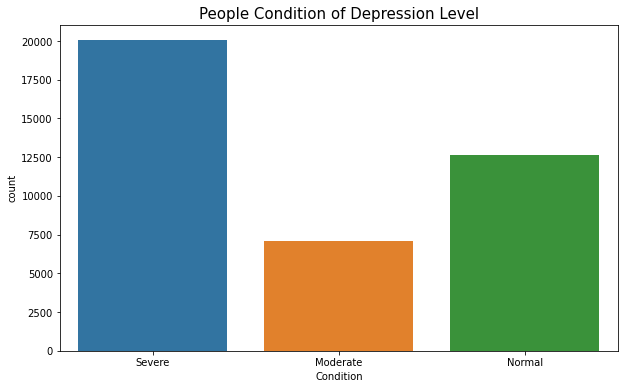

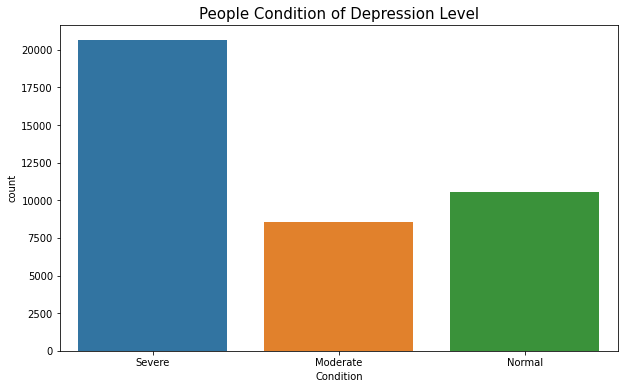

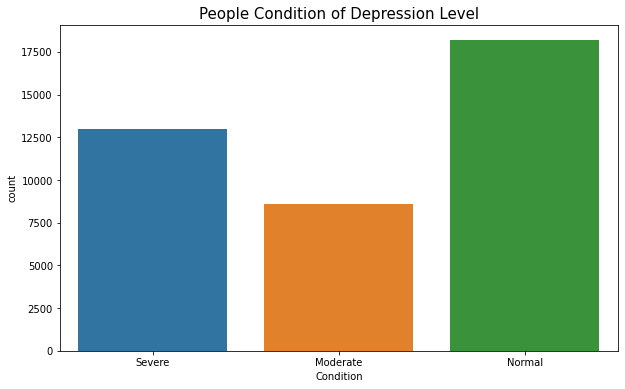

In [247]:
# Depression
plt.figure(figsize=(10,6))
sns.countplot(data_depression.Condition)
plt.title('People Condition of Depression Level',fontsize=15)

#Stress
plt.figure(figsize=(10,6))
sns.countplot(data_stress.Condition)
plt.title('People Condition of Depression Level',fontsize=15)

#Anxiety
plt.figure(figsize=(10,6))
sns.countplot(data_anxiety.Condition)
plt.title('People Condition of Depression Level',fontsize=15)

# NEURAL NETWORK

In [248]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

KeyboardInterrupt: 

In [ ]:
print(data_depression.iloc[:,-1:])

       Condition
0              3
1              3
2              3
3              2
4              3
...          ...
39770          3
39771          3
39772          1
39773          2
39774          3

[39775 rows x 1 columns]


In [ ]:
X_Depression = data_depression.iloc[:,0:14].values
y_Depression = data_depression.iloc[:,-1:].values

#X_Stress = data_stress.iloc[:,0:15].values
#y_Stress = data_stress.iloc[:,16].values

#X_Anxiety = data_anxiety.iloc[:,0:15].values
#y_Anxiety = data_anxiety.iloc[:,16].values

print(X_Depression)
print(y_Depression)

[[1 3 0 ... 0 1 3]
 [1 3 1 ... 3 1 1]
 [3 3 3 ... 3 3 3]
 ...
 [1 0 0 ... 0 0 0]
 [1 2 0 ... 0 1 2]
 [1 3 0 ... 1 3 3]]
[[3]
 [3]
 [3]
 ...
 [1]
 [2]
 [3]]


In [ ]:
print(y_Depression)

[[3]
 [3]
 [3]
 ...
 [1]
 [2]
 [3]]


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#lb = LabelEncoder()
#Y_Depression = pd.get_dummies(y_Depression).values
#Y_Depression = lb.fit_transform(y_Depression)
#Y_Stress = pd.get_dummies(y_Stress).values
#Y_Anxiety = pd.get_dummies(y_Anxiety).values

Y_Depression=y_Depression

#print(Y_Depression[0:6])
#print(Y_Stress[0:6])
#print(Y_Anxiety[0:6])
print(Y_Depression)

[[3]
 [3]
 [3]
 ...
 [1]
 [2]
 [3]]


In [ ]:
from sklearn.model_selection import train_test_split

X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(X_Depression, Y_Depression, test_size=0.3, random_state=0)
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_Stress, Y_Stress, test_size=0.3, random_state=0)
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(X_Anxiety, Y_Anxiety, test_size=0.3, random_state=0)

print(y_train_depression[0:50])
print(X_train_depression[0:50])

[[3]
 [3]
 [3]
 [2]
 [3]
 [3]
 [3]
 [3]
 [1]
 [3]
 [1]
 [3]
 [2]
 [1]
 [2]
 [3]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [1]
 [1]
 [3]
 [1]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]
 [2]
 [1]
 [3]
 [2]
 [1]
 [1]
 [2]
 [3]
 [1]
 [3]]
[[0 2 1 2 1 2 2 1 2 1 2 3 3 2]
 [3 3 2 3 2 3 3 3 3 3 3 2 3 3]
 [2 2 3 3 3 3 3 3 3 2 2 0 3 3]
 [2 3 2 0 0 1 0 1 1 2 0 1 1 3]
 [1 2 2 3 2 3 2 1 3 2 3 2 2 3]
 [3 3 3 3 2 1 1 3 3 3 1 0 1 3]
 [2 3 2 2 2 3 2 3 2 2 2 2 3 2]
 [2 2 3 3 2 1 3 3 3 2 2 3 3 2]
 [0 1 0 1 0 1 1 0 1 1 1 0 1 1]
 [1 2 1 3 2 3 2 1 2 1 3 3 3 2]
 [0 0 0 1 1 1 1 0 1 1 1 0 1 0]
 [3 2 2 3 3 2 1 3 3 3 3 2 2 2]
 [2 1 2 2 1 1 2 1 2 1 0 0 1 3]
 [1 0 1 1 0 1 0 1 1 0 0 0 1 1]
 [1 1 1 2 0 1 1 1 2 0 0 0 1 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 2 1 2 2 2 0 1 1 2 1 2 1 2]
 [0 0 1 0 0 1 1 0 1 1 0 0 0 3]
 [0 0 0 1 1 0 0 1 1 0 0 0 1 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [2 2 2 2 2 2 3 2 3 2 2 2 0 2]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1]
 [1 0 2 1 1 1 1 1 1 1 0 1 1 1]
 [1 0 1 0 1 1 1 0 1 0 1 1 1 1]
 [1 3

In [ ]:
#Depression Model
modelDepression = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(14,)),
    tf.keras.layers.Dense(256, input_shape=(14,), name="layer1"), #input_shape=[15]
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', name="layer2"),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dense(7, activation='softmax', name="layer3")
    tf.keras.layers.Dense(1)
  ])


# modelDepression.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# modelDepression.fit(X_train_depression, y_train_depression, batch_size=256, epochs=100)
modelDepression.summary()



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 256)               3840      
                                                                 
 dense_150 (Dense)           (None, 256)               65792     
                                                                 
 dense_151 (Dense)           (None, 128)               32896     
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 dense_152 (Dense)           (None, 32)                2080      
                                                                 
 dense_153 (Dense)           (None, 1)                 33        
                                                                 
Total params: 112,897
Trainable params: 112,897
Non-t

In [ ]:
modelDepression.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

historydep = modelDepression.fit(X_train_depression, y_train_depression, batch_size=256, epochs=10)

Epoch 1/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 2/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 3/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 4/10
109/109 [==============================] - 1s 6ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 5/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 6/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 7/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 8/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 9/10
109/109 [==============================] - 1s 5ms/step - loss: -18.1285 - accuracy: 0.3171
Epoch 10/10
109/109 [==============================] - 1s 6ms/step - loss: -18.128

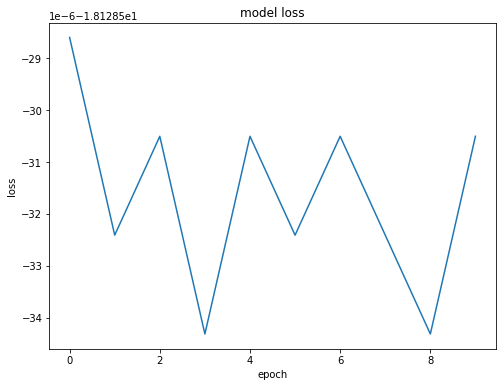

In [ ]:
from matplotlib.pyplot import figure

figure(figsize = (8,6))
plt.plot(historydep.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#X_hasil_depression = (4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4)
#X_hasil_depression = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
X_hasil_depression = (1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 2)

X_hasil_numpy_depression = np.asarray(X_hasil_depression)

X_hasil_reshaped_depression = X_hasil_numpy_depression.reshape(1,-1)

hasil_akhir_depression = modelDepression.predict(X_hasil_reshaped_depression)
print('Tingkat depresi: ',hasil_akhir_depression)

1/1 [==============================] - 0s 21ms/step
Tingkat depresi:  [[13.581249]]
